In [ ]:
from __future__ import print_function
import torch
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn .functional as F
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
batch_size = 128
num_classes = 10
epochs= 20
learning_rate = 0.001

In [ ]:
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
mnist_train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
mnist_train_loader = torch.utils.data.DataLoader(mnist_train_set, batch_size=batch_size, shuffle=True)
mnist_test_loader = torch.utils.data.DataLoader(mnist_test_set, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 43716462.71it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 52371679.13it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 20211208.09it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8377541.23it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
print(mnist_train_loader)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = F.dropout(out, p=0.2, training=self.training)
        out = self.fc2(out)
        out = F.relu(out)
        out = F.dropout(out, p=0.2, training=self.training)
        out = self.fc3(out)
        return F.log_softmax(out, dim=1)

In [ ]:
MLP = Net()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(MLP.parameters(), lr=learning_rate)

In [ ]:
list_loss_train = []
list_accuracy_train = []
list_loss_test = []
list_accuracy_test = []

y_pred_list = []
y_true_list = []

for epoch in range(epochs):
    MLP.train()
    sous_list_loss_train = []
    sous_valeur_accuracy_train = 0
    for inputs_train, labels_train in mnist_train_loader:
        optimizer.zero_grad()
        outputs = MLP(inputs_train.view(-1, 784))
        loss = criterion(outputs, labels_train)
        loss.backward()
        optimizer.step()

        sous_list_loss_train.append(loss.item())
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels_train).sum().item()
        sous_valeur_accuracy_train += correct

    list_accuracy_train.append(sous_valeur_accuracy_train / len(mnist_train_set))

    list_loss_train.append(np.mean(sous_list_loss_train))

    MLP.eval()
    with torch.no_grad():
        sous_list_loss_test = []
        sous_valeur_accuracy_test = 0
        for inputs_test, labels_test in mnist_test_loader:
            test_outputs = MLP(inputs_test.view(-1, 784))
            loss = criterion(test_outputs, labels_test)
            sous_list_loss_test.append(loss.item())
            _, predicted = torch.max(test_outputs, 1)
            correct = (predicted == labels_test).sum().item()

            y_pred_list.extend(predicted)
            y_true_list.extend(labels_test)

            sous_valeur_accuracy_test += correct
        list_accuracy_test.append(sous_valeur_accuracy_test / len(mnist_test_set))
        list_loss_test.append(np.mean(sous_list_loss_test))

In [ ]:
print(list_loss_train)
print(list_loss_test)

[0.2791798177288412, 0.11901271126783097, 0.09051384974016881, 0.07207465365525088, 0.06457389250441369, 0.05338481919510342, 0.0493058549043641, 0.044970168398126266, 0.040010710890992666, 0.039346320675031944, 0.03539656722575112, 0.03427036876528601, 0.030769617383011868, 0.031082189702458664, 0.03093416973186939, 0.02993666977626083, 0.02778662225295569, 0.02748061397187, 0.02597785735819196, 0.02698788061307321]
[0.15410238652949845, 0.10644966864124342, 0.07545361419494229, 0.07917762116110542, 0.085008467256373, 0.07687806191170009, 0.06211684730631164, 0.07202474768017722, 0.09471259389405692, 0.07761014399299791, 0.08719406476668351, 0.085026954277734, 0.08804773977811271, 0.08345854293942254, 0.09732995799248484, 0.08063473515465626, 0.09280395526422891, 0.09563295102116157, 0.09168574153875181, 0.08574595155144601]


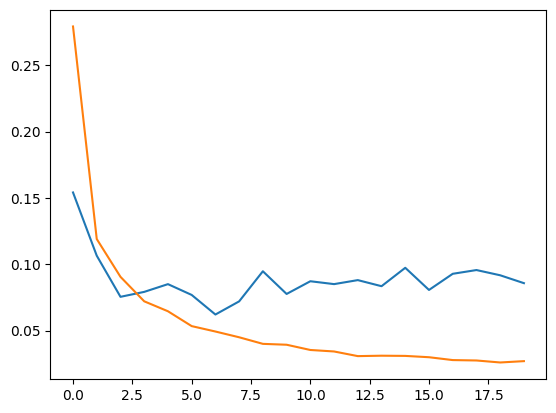

In [ ]:
plt.plot(list_loss_test)
plt.plot(list_loss_train)
plt.show()

In [ ]:
print(list_accuracy_train)
print(list_accuracy_test)

[0.9188166666666666, 0.9633333333333334, 0.97185, 0.9775333333333334, 0.9798, 0.9827666666666667, 0.9851, 0.9856666666666667, 0.9866666666666667, 0.9872333333333333, 0.9887666666666667, 0.9890333333333333, 0.9905, 0.99015, 0.9902833333333333, 0.9906833333333334, 0.9918, 0.9920333333333333, 0.99205, 0.9914833333333334]
[0.9509, 0.9658, 0.9765, 0.9752, 0.9761, 0.9784, 0.9814, 0.9817, 0.9776, 0.9808, 0.9793, 0.981, 0.982, 0.9822, 0.9801, 0.9834, 0.9821, 0.9826, 0.9829, 0.9842]


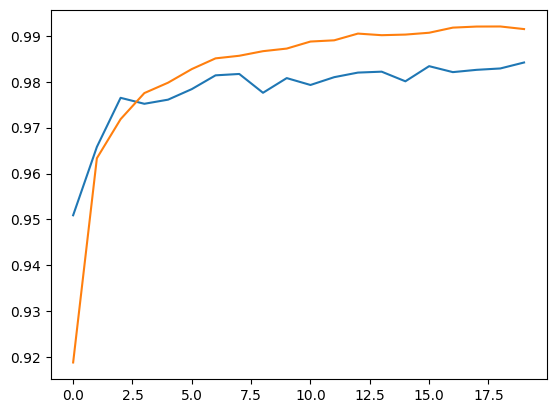

In [ ]:
plt.plot(list_accuracy_test)
plt.plot(list_accuracy_train)
plt.show()

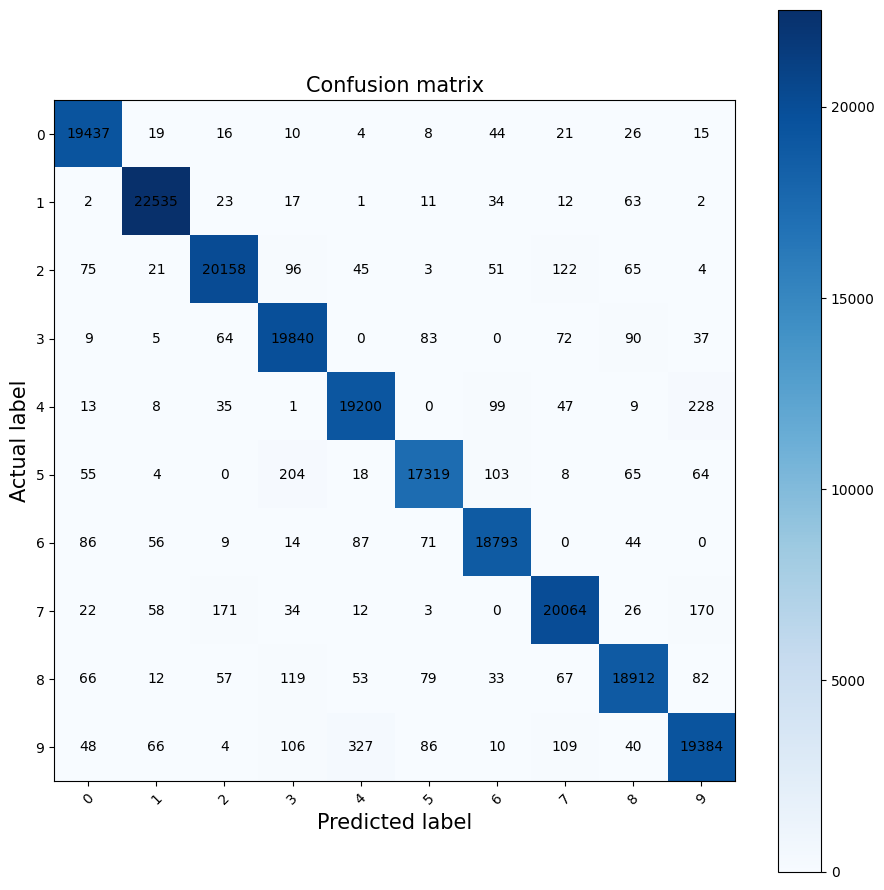

In [ ]:
import sklearn.metrics as metrics

from sklearn.metrics import confusion_matrix
import numpy as np


# Compute confusion matrix
cm = confusion_matrix(y_true_list, y_pred_list)
# print with matplotlib
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0","1","2","3","4","5","6","7","8","9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0","1","2","3","4","5","6","7","8","9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x),
  horizontalalignment='center',
  verticalalignment='center')
plt.show()